In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

import warnings

warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel("C:/Users/Hanny/Downloads/Data_Train.xlsx")
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
dataset.info()       # Print Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
dataset.dropna(inplace = True)

In [6]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Feature Engineering

In [7]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Handling Object Data
Date_of_Journey, Dep_Time, Arrival_Time, Duration are object datatype. To derive numeric features on these, we use pandas to_datetime method to convert object data type to datetime datatype.

Attribute .dt.day will extract day from the date
Attribute .dt.month will extract month from that date

In [8]:
# Date_of_Journey is the day when plane departs. 
dataset["journey_day"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
dataset["journey_month"] = pd.to_datetime(dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [9]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [10]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
dataset["dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
# Extracting Minutes
dataset["dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute
# Now we drop Dep_Time as it is of no use
dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [11]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
dataset["arrival_hour"] = pd.to_datetime(dataset["Arrival_Time"]).dt.hour
# Extracting Minutes
dataset["arrival_min"] = pd.to_datetime(dataset["Arrival_Time"]).dt.minute
# Now we can drop Arrival_Time as it is of no use
dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

In [12]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(dataset["Duration"])
# In table above, Row Index=2, we have Duration = 19h (missing minutes)
# Looping through all duration values
# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Add duration_hours and duration_mins list to our dataset df
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
dataset.drop(["Duration"], axis = 1, inplace = True)

dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Handling Categorical Data
Airline, Source, Destination, Route, Total_Stops, Additional_Info are all categorical. One can find many ways to handle categorical data, like:

Nominal data --> data is not in any order --> OneHotEncoder is used in this case
Ordinal data --> data is in order --> LabelEncoder is used in this case

In [14]:
# Feature engineering on: Airline
dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = dataset[["Airline"]]
Current_Airline_List = Airline['Airline']
New_Airline_List = []

for carrier in Current_Airline_List:
    if carrier in ['Jet Airways', 'IndiGo', 'Air India', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
        New_Airline_List.append(carrier)
    
    else:
        New_Airline_List.append('Other')

Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [16]:
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [17]:
# Feature engineering on: Source
dataset["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [18]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [19]:
# Feature engineering on: Destination
dataset["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [21]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [22]:
# Feature engineering on: Total_Stops
dataset["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [23]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [24]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([dataset, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


In [25]:
data_train.shape

(10682, 26)

Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods:

feature_importance_: To check for relative feature importance
Variable Inflation Factor (VIF): To check for multicollinearity

In [26]:
# data_train.columns

In [27]:
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y = data_train.iloc[:, 1]

print(X.shape, y.shape)

(10682, 25) (10682,)


feature_importance_

In [28]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.2425416  0.14096523 0.06857983 0.0306084  0.02838969 0.03550656
 0.02583345 0.13461424 0.02171476 0.00933254 0.00200773 0.01103716
 0.10388788 0.01441552 0.02308255 0.00378086 0.00533458 0.00118276
 0.02601818 0.01243783 0.01785747 0.00838286 0.02656626 0.00370251
 0.00221954]


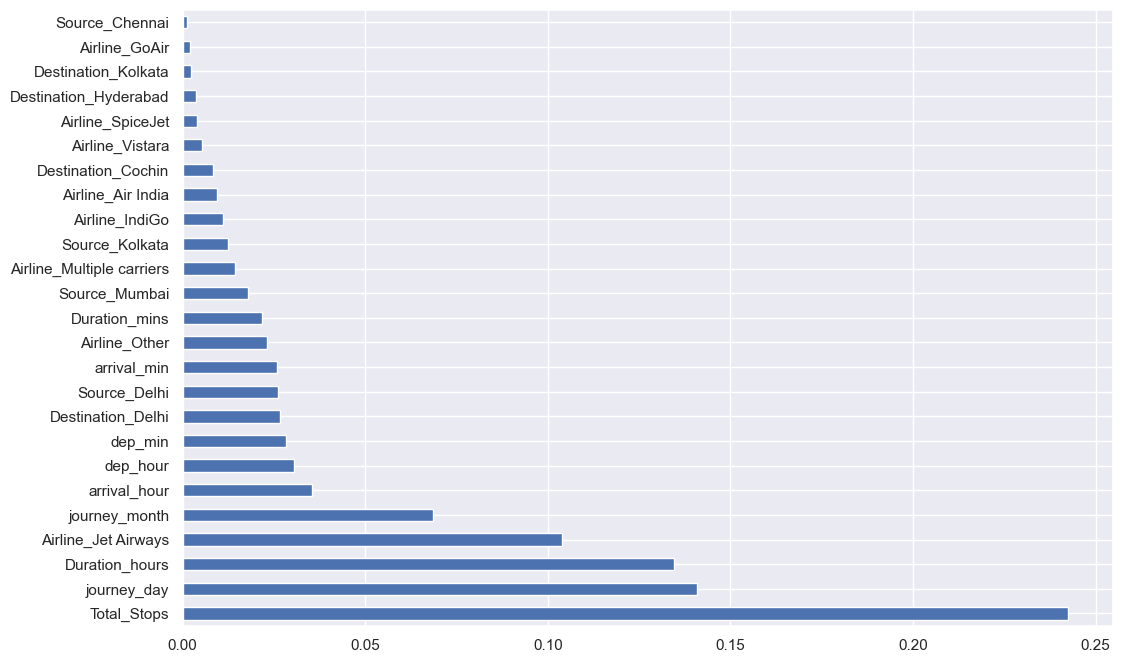

In [29]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

VIF - Multicollinearity

In [30]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [31]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,Total_Stops,7.483614
1,journey_day,3.509757
2,journey_month,16.058719
3,dep_hour,5.755551
4,dep_min,2.777481
5,arrival_hour,4.887929
6,arrival_min,3.429245
7,Duration_hours,6.085587
8,Duration_mins,4.067779
9,Airline_Air India,5.004881


In [32]:
# Drop 'Source_Delhi'
X = data_train.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


Fit model - Random Forest

Split dataset into train and test set in order to predict, w.r.t, X_test
If needed do scaling of data
Scaling is not required in Random forest
Train Model
Gauge Model Performance
In regression check RSME Score

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

Model Performance

In [35]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 95.21
Model Performance on Test Set: 76.22


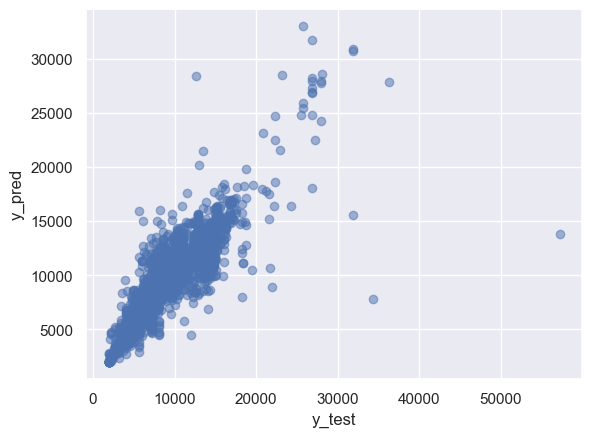

In [36]:
# Plot performance graph
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [37]:
# Model Error Values
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# RMSE = sqrt((PV-OV)^2/n)
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
# RMSE/(max(DV)-min(DV))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

MAE: 1304.1579186659023
MSE: 5127199.258122033
RMSE: 2264.331967296764
Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


Save the model .pkl

In [38]:
import pickle
# open a file, where you ant to store the data
file = open('c1_flight_rf.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

Prediction on Unseen data

In [39]:
import pickle
path = 'c1_flight_rf.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

In [41]:
unseen_dataset = pd.read_excel("C:/Users/Hanny/Downloads/a2_Unseen_Dataset.xlsx")
unseen_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149


In [42]:
# Perform feature engineering on object dt variables
# Feature Engineering on: 'Date_of_Journey'
unseen_dataset["journey_day"] = pd.to_datetime(unseen_dataset.Date_of_Journey, format="%d/%m/%Y").dt.day
unseen_dataset["journey_month"] = pd.to_datetime(unseen_dataset["Date_of_Journey"], format = "%d/%m/%Y").dt.month
unseen_dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Feature Engineering on: 'Dep_Time'
unseen_dataset["dep_hour"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.hour
unseen_dataset["dep_min"] = pd.to_datetime(unseen_dataset["Dep_Time"]).dt.minute
unseen_dataset.drop(["Dep_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Arrival_Time'
unseen_dataset["arrival_hour"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.hour
unseen_dataset["arrival_min"] = pd.to_datetime(unseen_dataset["Arrival_Time"]).dt.minute
unseen_dataset.drop(["Arrival_Time"], axis = 1, inplace = True)

# Feature Engineering on: 'Duration'
duration = list(unseen_dataset["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
unseen_dataset["Duration_hours"] = duration_hours
unseen_dataset["Duration_mins"] = duration_mins
unseen_dataset.drop(["Duration"], axis = 1, inplace = True)


# Perform feature engineering on Categorical dt variables
# Feature Engineering on: 'Airline'
Airline = unseen_dataset[["Airline"]]
New_Airline_List = []
Current_Airline_List = Airline['Airline']
for carrier in Current_Airline_List:
    if carrier in ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet','Multiple carriers', 'GoAir', 'Vistara', 'Air Asia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')
Airline['Airline'] = pd.DataFrame(New_Airline_List)
Airline = pd.get_dummies(Airline, drop_first= True)

# Feature Engineering on: 'Source'
Source = unseen_dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

# Feature Engineering on: 'Destination'
Destination = unseen_dataset[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []
for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)
Destination['Destination'] = pd.DataFrame(New_Destination_List)
Destination['Destination'].value_counts()
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

# Feature Engineering on: 'Route', 'Additional_Info
unseen_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Feature Engineering on: 'Total_Stops'
unseen_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_dataset, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# See how the test dataset looks
data_test.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,12898,27,5,7,5,19,0,11,55,...,0,0,0,1,0,0,1,0,0,0
1,1,10851,6,3,2,5,7,25,5,20,...,0,0,0,1,0,0,1,0,0,0
2,1,5704,21,3,9,45,23,0,13,15,...,0,0,0,1,0,0,1,0,0,0
3,0,11598,18,3,21,10,0,5,2,55,...,0,1,0,0,0,0,0,1,0,0
4,1,9149,27,5,8,30,19,15,10,45,...,0,0,0,1,0,0,1,0,0,0


In [43]:
# Drop 'Source_Delhi'
X_unseen = data_test.loc[:, ['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Other',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']]
y_unseen = data_test.iloc[:, 1]

In [44]:
# Predictions on unseen data
y_pred = rf_model.predict(X_unseen)

In [45]:
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_unseen, y_pred))/(max(y_unseen)-min(y_unseen)),2))
print('Max Value: ', max(y_unseen), '\nMin Value: ', min(y_unseen))
print('R2 value: ', round(metrics.r2_score(y_unseen, y_pred),2))

Normalized RMSE:  0.05
Max Value:  57209 
Min Value:  1759
R2 value:  0.68


In [47]:
# writing model output file
df_y_pred = pd.DataFrame(y_pred,columns= ['Predicted Price'])
original_dataset = pd.read_excel("C:/Users/Hanny/Downloads/a2_Unseen_Dataset.xlsx")
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
dfx.to_excel("c2_ModelOutput.xlsx")
dfx.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Predicted Price
0,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,12898,15416.395000
1,IndiGo,6/03/2019,Delhi,Cochin,DEL → MAA → COK,02:05,07:25,5h 20m,1 stop,No info,10851,10569.390000
2,Air India,21/03/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,5704,6523.780000
3,Vistara,18/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 16 Mar,2h 55m,non-stop,No info,11598,5694.458500
4,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,08:30,19:15,10h 45m,1 stop,No info,9149,9266.361833
